In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib.request
import time
import datetime
import pickle
from datetime import datetime, timedelta

In [2]:
#loading dataframe
pickle_in=open('fireCleaned.pickle','rb')
df = pickle.load(pickle_in)

In [3]:
#loading original data
#reading xlsx
xls = pd.ExcelFile('20050101--20171231_ODF_Fire_Point_Data.xlsx')
oregon = pd.read_excel(xls, '20050101--20171231_ODF_FireData')

In [97]:
dfcleaned = df.drop(['API_End','API_Start','API_Time','LandmarkLocation'],axis=1)

In [98]:
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12874 entries, 0 to 13451
Data columns (total 34 columns):
ID                   12874 non-null int64
CreationDate         12872 non-null datetime64[ns]
ModifiedDate         12874 non-null datetime64[ns]
FireYear             12874 non-null int64
Area                 12874 non-null object
District             12874 non-null int64
Unit                 12874 non-null int64
FireNumber           12874 non-null int64
FiscalYear           12874 non-null int64
FireName             12874 non-null object
Twn                  12872 non-null object
Rng                  12871 non-null object
Sec                  12872 non-null float64
Subdiv               12858 non-null object
Long_DD              12871 non-null float64
Lat_DD               12871 non-null float64
LO_Name              12866 non-null object
HumanOrLightning     12874 non-null object
CauseByDesc          12810 non-null object
GeneralDesc          12873 non-null object
SpecificDesc      

In [99]:
#dropping all columns that are not relevant
dfcleaned.drop(['ID','FireName','Rng','SpecificDesc','Cause_Comments','CreationDate','ModifiedDate','LO_Name'],axis=1,inplace=True)

In [100]:
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12874 entries, 0 to 13451
Data columns (total 26 columns):
FireYear             12874 non-null int64
Area                 12874 non-null object
District             12874 non-null int64
Unit                 12874 non-null int64
FireNumber           12874 non-null int64
FiscalYear           12874 non-null int64
Twn                  12872 non-null object
Sec                  12872 non-null float64
Subdiv               12858 non-null object
Long_DD              12871 non-null float64
Lat_DD               12871 non-null float64
HumanOrLightning     12874 non-null object
CauseByDesc          12810 non-null object
GeneralDesc          12873 non-null object
Ign_DateTime         12874 non-null datetime64[ns]
ReportDateAndTime    12874 non-null datetime64[ns]
Control_DateTime     12822 non-null datetime64[ns]
FireTotalAcres       12825 non-null float64
ODFProtectedAcres    12874 non-null float64
Temp                 12870 non-null float64
DewPoi

In [101]:
#dropping blank values
dfcleaned.dropna(subset=['CauseByDesc','Control_DateTime','PrecipProb','PrecipInten'],inplace=True)

In [102]:
#adding a column for duration of fire
dfcleaned['FireDuration']= dfcleaned['Control_DateTime'] - dfcleaned['Ign_DateTime']

In [103]:
dfcleaned['Days']=[x.days for x in dfcleaned['FireDuration']]

In [104]:
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12804 entries, 0 to 13440
Data columns (total 28 columns):
FireYear             12804 non-null int64
Area                 12804 non-null object
District             12804 non-null int64
Unit                 12804 non-null int64
FireNumber           12804 non-null int64
FiscalYear           12804 non-null int64
Twn                  12804 non-null object
Sec                  12804 non-null float64
Subdiv               12802 non-null object
Long_DD              12804 non-null float64
Lat_DD               12804 non-null float64
HumanOrLightning     12804 non-null object
CauseByDesc          12804 non-null object
GeneralDesc          12803 non-null object
Ign_DateTime         12804 non-null datetime64[ns]
ReportDateAndTime    12804 non-null datetime64[ns]
Control_DateTime     12804 non-null datetime64[ns]
FireTotalAcres       12804 non-null float64
ODFProtectedAcres    12804 non-null float64
Temp                 12804 non-null float64
DewPoi

In [13]:
dfcleaned.describe()

,FireYear,District,Unit,FireNumber,FiscalYear,Sec,Long_DD,Lat_DD,FireTotalAcres,ODFProtectedAcres,Temp,DewPoint,Humidity,PrecipProb,PrecipInten,Wind,FireDuration,Days
count,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804,12804.000000
mean,2010.885739,77.794205,1.824274,106.486489,2011.665886,18.645970,-122.227932,43.736493,172.316860,32.406286,69.308585,46.529243,0.489695,0.037247,0.001573,2.769237,9 days 11:52:20.257731,9.202202
std,3.835583,14.767803,1.043033,127.973068,3.835978,10.416696,1.706404,1.236770,3263.900735,659.342219,13.148431,8.416800,0.209875,0.133200,0.010503,2.130424,259 days 09:11:39.496089,259.380877
min,2005.000000,51.000000,1.000000,1.000000,2005.000000,1.000000,-124.536670,41.898890,0.000000,0.000000,12.480000,0.890000,0.060000,0.000000,0.000000,0.000000,-2556 days +07:30:00,-2556.000000
25%,2007.000000,71.000000,1.000000,26.000000,2008.000000,10.000000,-123.371940,42.526040,0.010000,0.010000,60.367500,41.780000,0.320000,0.000000,0.000000,1.230000,0 days 01:16:00,0.000000
50%,2011.000000,73.000000,2.000000,58.000000,2012.000000,19.000000,-122.810000,43.604305,0.100000,0.100000,69.720000,47.810000,0.450000,0.000000,0.000000,2.320000,0 days 05:30:00,0.000000
75%,2014.000000,95.000000,2.000000,138.000000,2015.000000,28.000000,-121.533435,44.853678,0.500000,0.350000,79.120000,52.640000,0.640000,0.000000,0.000000,3.740000,1 days 09:09:15,1.000000
max,2017.000000,99.000000,5.000000,861.000000,2018.000000,36.000000,-116.521110,46.235000,190590.000000,33788.000000,104.710000,65.970000,1.000000,1.000000,0.397400,24.860000,24111 days 07:11:00,24111.000000


In [14]:
#removing fires where timedelta (days) is less than zero
dfcleaned = dfcleaned[dfcleaned['Days']>=0]

In [16]:
#removing fires where timedelta (days) is greater than 100 days and fireacres is less than 1000
dfcleaned = dfcleaned[(dfcleaned['Days']<=100)&(dfcleaned['FireTotalAcres']<=1000)]

In [17]:
dfcleaned.describe()

,FireYear,District,Unit,FireNumber,FiscalYear,Sec,Long_DD,Lat_DD,FireTotalAcres,ODFProtectedAcres,Temp,DewPoint,Humidity,PrecipProb,PrecipInten,Wind,FireDuration,Days
count,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575,12575.000000
mean,2010.885249,77.690736,1.818449,106.875149,2011.663062,18.644930,-122.243341,43.732723,5.399860,4.047311,69.394596,46.615981,0.489365,0.036608,0.001563,2.771551,1 days 21:27:44.927236,1.604374
std,3.836874,14.751858,1.039636,128.335022,3.837661,10.416893,1.692977,1.235887,40.353529,31.023020,13.004227,8.355507,0.208982,0.132050,0.010559,2.128368,6 days 18:14:30.967904,6.713067
min,2005.000000,51.000000,1.000000,1.000000,2005.000000,1.000000,-124.536670,41.998890,0.000000,0.000000,19.810000,0.890000,0.060000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000
25%,2007.000000,71.000000,1.000000,26.000000,2008.000000,10.000000,-123.372360,42.523750,0.010000,0.010000,60.450000,41.920000,0.320000,0.000000,0.000000,1.230000,0 days 01:15:00,0.000000
50%,2011.000000,73.000000,2.000000,58.000000,2012.000000,19.000000,-122.814830,43.593890,0.100000,0.100000,69.750000,47.890000,0.450000,0.000000,0.000000,2.330000,0 days 05:10:00,0.000000
75%,2014.000000,95.000000,2.000000,139.000000,2015.000000,28.000000,-121.544440,44.846250,0.430000,0.300000,79.110000,52.700000,0.640000,0.000000,0.000000,3.740000,1 days 04:39:00,1.000000
max,2017.000000,99.000000,5.000000,861.000000,2018.000000,36.000000,-116.783060,46.235000,966.000000,840.000000,104.710000,65.970000,1.000000,1.000000,0.397400,24.860000,100 days 12:32:00,100.000000


In [20]:
dfcleaned.drop(['ReportDateAndTime','Ign_DateTime','Control_DateTime','FireDuration'], axis=1,inplace=True)

In [108]:
dfcleaned.describe()

,FireYear,District,Unit,FireNumber,FiscalYear,Sec,Long_DD,Lat_DD,FireTotalAcres,ODFProtectedAcres,Temp,DewPoint,Humidity,PrecipProb,PrecipInten,Wind,FireDuration,Days
count,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804.000000,12804,12804.000000
mean,2010.885739,77.794205,1.824274,106.486489,2011.665886,18.645970,-122.227932,43.736493,172.316860,32.406286,69.308585,46.529243,0.489695,0.037247,0.001573,2.769237,9 days 11:52:20.257731,9.202202
std,3.835583,14.767803,1.043033,127.973068,3.835978,10.416696,1.706404,1.236770,3263.900735,659.342219,13.148431,8.416800,0.209875,0.133200,0.010503,2.130424,259 days 09:11:39.496089,259.380877
min,2005.000000,51.000000,1.000000,1.000000,2005.000000,1.000000,-124.536670,41.898890,0.000000,0.000000,12.480000,0.890000,0.060000,0.000000,0.000000,0.000000,-2556 days +07:30:00,-2556.000000
25%,2007.000000,71.000000,1.000000,26.000000,2008.000000,10.000000,-123.371940,42.526040,0.010000,0.010000,60.367500,41.780000,0.320000,0.000000,0.000000,1.230000,0 days 01:16:00,0.000000
50%,2011.000000,73.000000,2.000000,58.000000,2012.000000,19.000000,-122.810000,43.604305,0.100000,0.100000,69.720000,47.810000,0.450000,0.000000,0.000000,2.320000,0 days 05:30:00,0.000000
75%,2014.000000,95.000000,2.000000,138.000000,2015.000000,28.000000,-121.533435,44.853678,0.500000,0.350000,79.120000,52.640000,0.640000,0.000000,0.000000,3.740000,1 days 09:09:15,1.000000
max,2017.000000,99.000000,5.000000,861.000000,2018.000000,36.000000,-116.521110,46.235000,190590.000000,33788.000000,104.710000,65.970000,1.000000,1.000000,0.397400,24.860000,24111 days 07:11:00,24111.000000


In [106]:
corrdf = dfcleaned[['Area','FireNumber','Long_DD','Lat_DD','FireTotalAcres','ODFProtectedAcres','Temp','DewPoint','Humidity','Weather','PrecipProb','Wind','Days']]

In [87]:
pplot = dfcleaned[['Area','FireTotalAcres','Temp','Humidity','PrecipProb','Wind','Days']]

In [96]:
pplot.describe()

,FireTotalAcres,Temp,Humidity,PrecipProb,Wind,Days
count,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000
mean,5.399860,69.394596,0.489365,0.036608,2.771551,1.604374
std,40.353529,13.004227,0.208982,0.132050,2.128368,6.713067
min,0.000000,19.810000,0.060000,0.000000,0.000000,0.000000
25%,0.010000,60.450000,0.320000,0.000000,1.230000,0.000000
50%,0.100000,69.750000,0.450000,0.000000,2.330000,0.000000
75%,0.430000,79.110000,0.640000,0.000000,3.740000,1.000000
max,966.000000,104.710000,1.000000,1.000000,24.860000,100.000000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

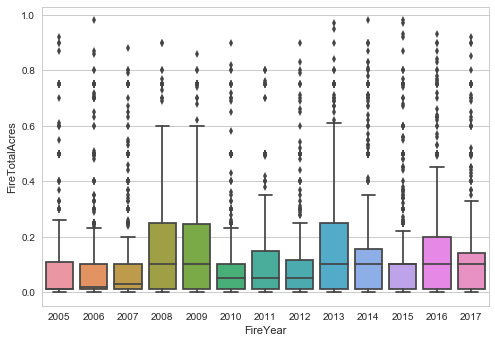

In [123]:
sns.boxplot(x='FireYear',y='FireTotalAcres', data=dfunder1)
plt.show()

The spread of this dataset looks to be really large.  The means and the highest fire acres is actually extremely large; this could affect the correlation and distribution of the dataset.

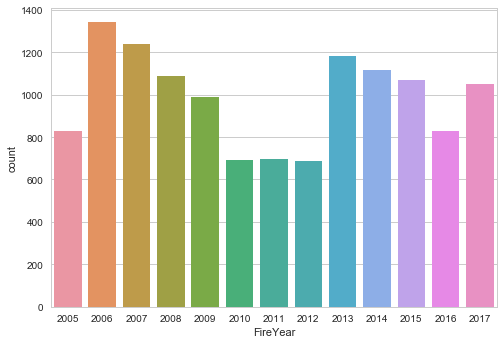

In [124]:
#count of fires per year
sns.countplot(x='FireYear',data=dfcleaned)
plt.show()

Looking at the graph above, it does not appear there are any trends with the amount of fires that has occurred. Based on the counts, it appears that there was a downward trend from 2006 to 2012. 

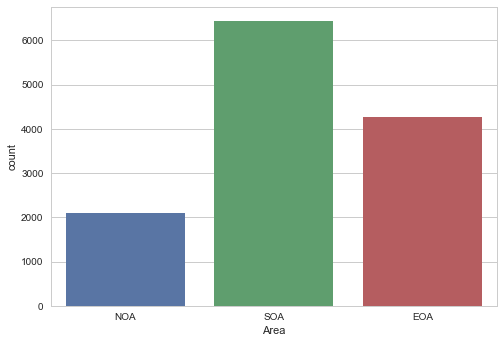

In [125]:
#count of fires by area
sns.countplot(x='Area',data=dfcleaned)
plt.show()

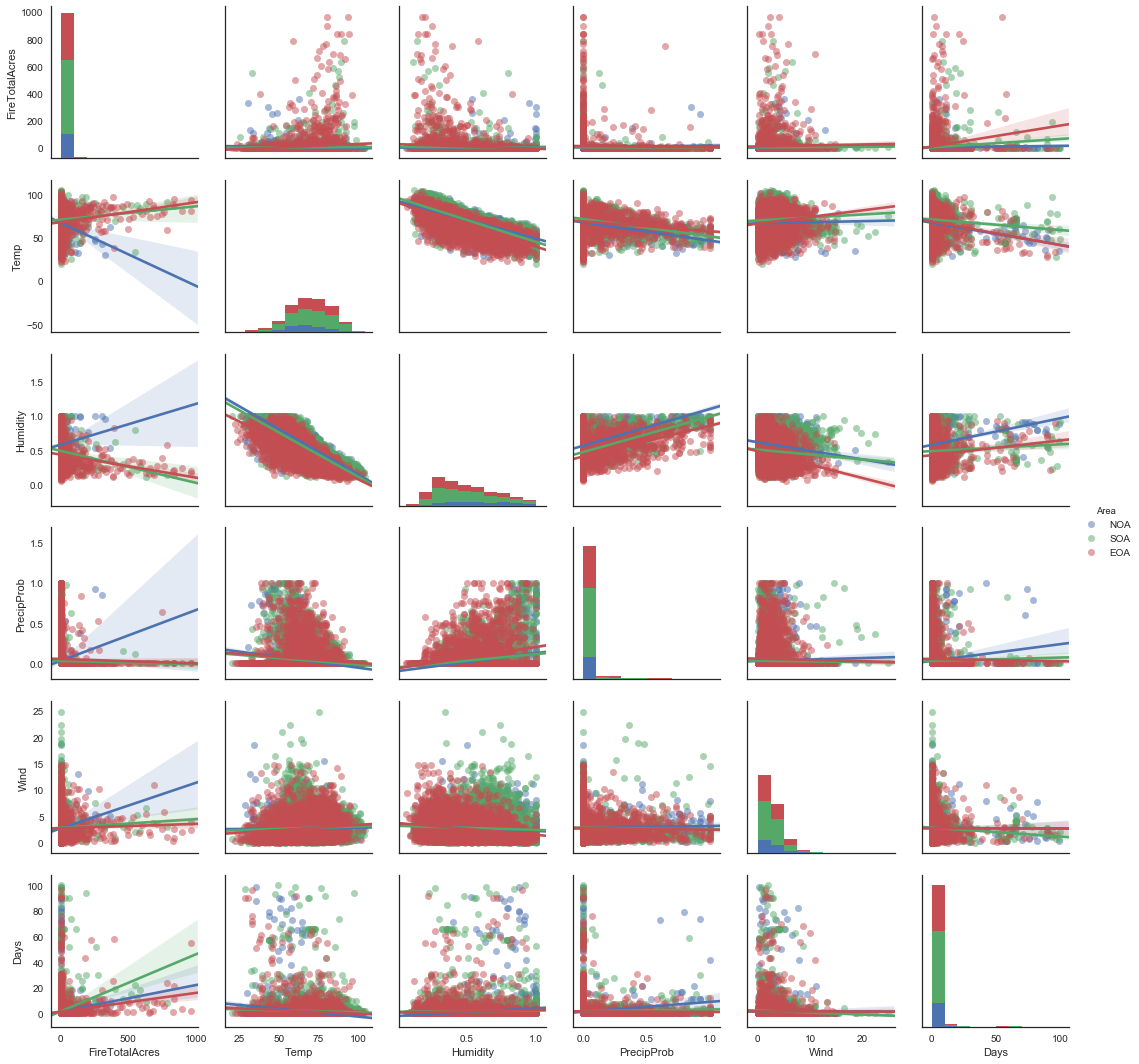

In [120]:
_ = sns.pairplot(pplot,hue='Area',kind='reg', plot_kws ={'scatter_kws': {'alpha': 0.5}})

plt.show()

Based on this pairplot, it looks like for total acres burned; the spread in NOA area is extremely large versus SOA and EOA.  Evaluating the NOA fires in depth and cleaning the dataset could show a difference.

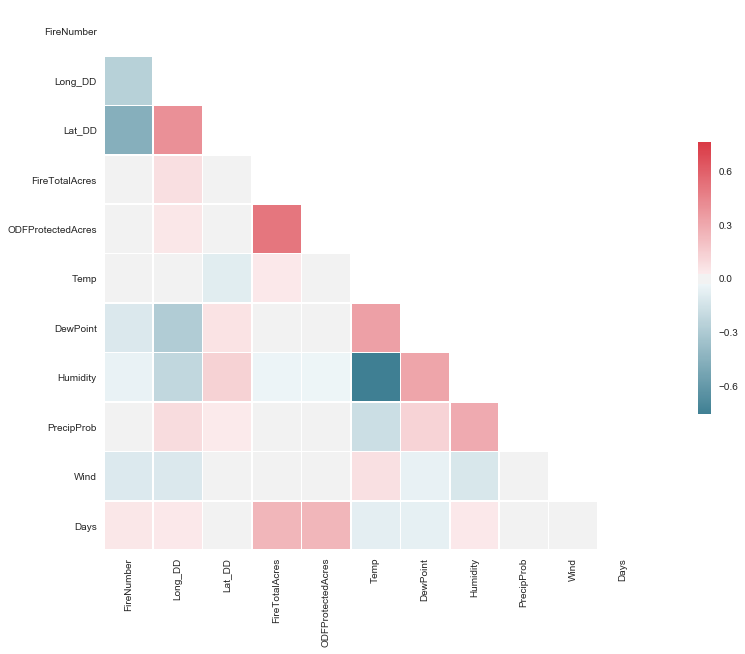

In [121]:
# sns.set(style='white')
#finding a correlation matrix
corr = corrdf.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(18,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Based on this correlation plot and pairplot, it appears that the total acres burned has very little correlation with any factors except with the number of days a fire has burned and a slight correlation with temperature.  Next step is to remove the extreme values (outliers) and rerun the pairplot and correlation to see if there is a difference.

In [128]:
#creating a function to separate out wanted columns
def graphs(df):
    corrdf = df[['Area','FireNumber','Long_DD','Lat_DD','FireTotalAcres','ODFProtectedAcres','Temp','DewPoint','Humidity','Weather','PrecipProb','Wind','Days']]
    pplotdf = df[['Area','FireTotalAcres','Temp','Humidity','PrecipProb','Wind','Days']]
    return corrdf, pplotdf

In [130]:
dfcleaned['FireTotalAcres'].describe()

count     12804.000000
mean        172.316860
std        3263.900735
min           0.000000
25%           0.010000
50%           0.100000
75%           0.500000
max      190590.000000
Name: FireTotalAcres, dtype: float64

In [153]:
df_non_neg = dfcleaned[(dfcleaned['Days']>=0)&(dfcleaned['Days']<=172)]
df_non_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12729 entries, 0 to 13440
Data columns (total 28 columns):
FireYear             12729 non-null int64
Area                 12729 non-null object
District             12729 non-null int64
Unit                 12729 non-null int64
FireNumber           12729 non-null int64
FiscalYear           12729 non-null int64
Twn                  12729 non-null object
Sec                  12729 non-null float64
Subdiv               12727 non-null object
Long_DD              12729 non-null float64
Lat_DD               12729 non-null float64
HumanOrLightning     12729 non-null object
CauseByDesc          12729 non-null object
GeneralDesc          12728 non-null object
Ign_DateTime         12729 non-null datetime64[ns]
ReportDateAndTime    12729 non-null datetime64[ns]
Control_DateTime     12729 non-null datetime64[ns]
FireTotalAcres       12729 non-null float64
ODFProtectedAcres    12729 non-null float64
Temp                 12729 non-null float64
DewPoi

Removed fires that were longer than 172 days and fires that were shorter than 0 days.  172 was selected because that was the biggest fire in Oregon History that occurred in 2002.

In [154]:
dfunder100 = df_non_neg[df_non_neg['FireTotalAcres']<100]
dfunder100.describe()

,FireYear,District,Unit,FireNumber,FiscalYear,Sec,Long_DD,Lat_DD,FireTotalAcres,ODFProtectedAcres,Temp,DewPoint,Humidity,PrecipProb,PrecipInten,Wind,FireDuration,Days
count,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453.000000,12453,12453.000000
mean,2010.884526,77.559945,1.813459,107.500442,2011.661447,18.649161,-122.264597,43.724950,1.703008,1.480760,69.263488,46.639806,0.491586,0.036842,0.001576,2.763741,2 days 06:29:10.238496,1.982414
std,3.835038,14.724252,1.038748,128.673085,3.836301,10.424257,1.677191,1.234776,7.440693,6.641493,13.041260,8.364739,0.208863,0.132551,0.010602,2.124085,10 days 09:30:29.781640,10.365235
min,2005.000000,51.000000,1.000000,1.000000,2005.000000,1.000000,-124.536670,41.998890,0.000000,0.000000,12.520000,0.890000,0.060000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000
25%,2007.000000,71.000000,1.000000,26.000000,2008.000000,10.000000,-123.374720,42.522000,0.010000,0.010000,60.330000,41.930000,0.320000,0.000000,0.000000,1.220000,0 days 01:15:00,0.000000
50%,2011.000000,73.000000,2.000000,59.000000,2012.000000,19.000000,-122.818670,43.578060,0.100000,0.100000,69.630000,47.930000,0.460000,0.000000,0.000000,2.320000,0 days 05:00:00,0.000000
75%,2014.000000,95.000000,2.000000,140.000000,2015.000000,28.000000,-121.566390,44.829170,0.340000,0.250000,78.990000,52.720000,0.640000,0.000000,0.000000,3.730000,1 days 03:40:00,1.000000
max,2017.000000,99.000000,5.000000,861.000000,2018.000000,36.000000,-116.783060,46.235000,99.350000,99.350000,104.710000,65.970000,1.000000,1.000000,0.397400,24.860000,172 days 14:00:00,172.000000


In [155]:
corr100, pplot100 = graphs(dfunder100)

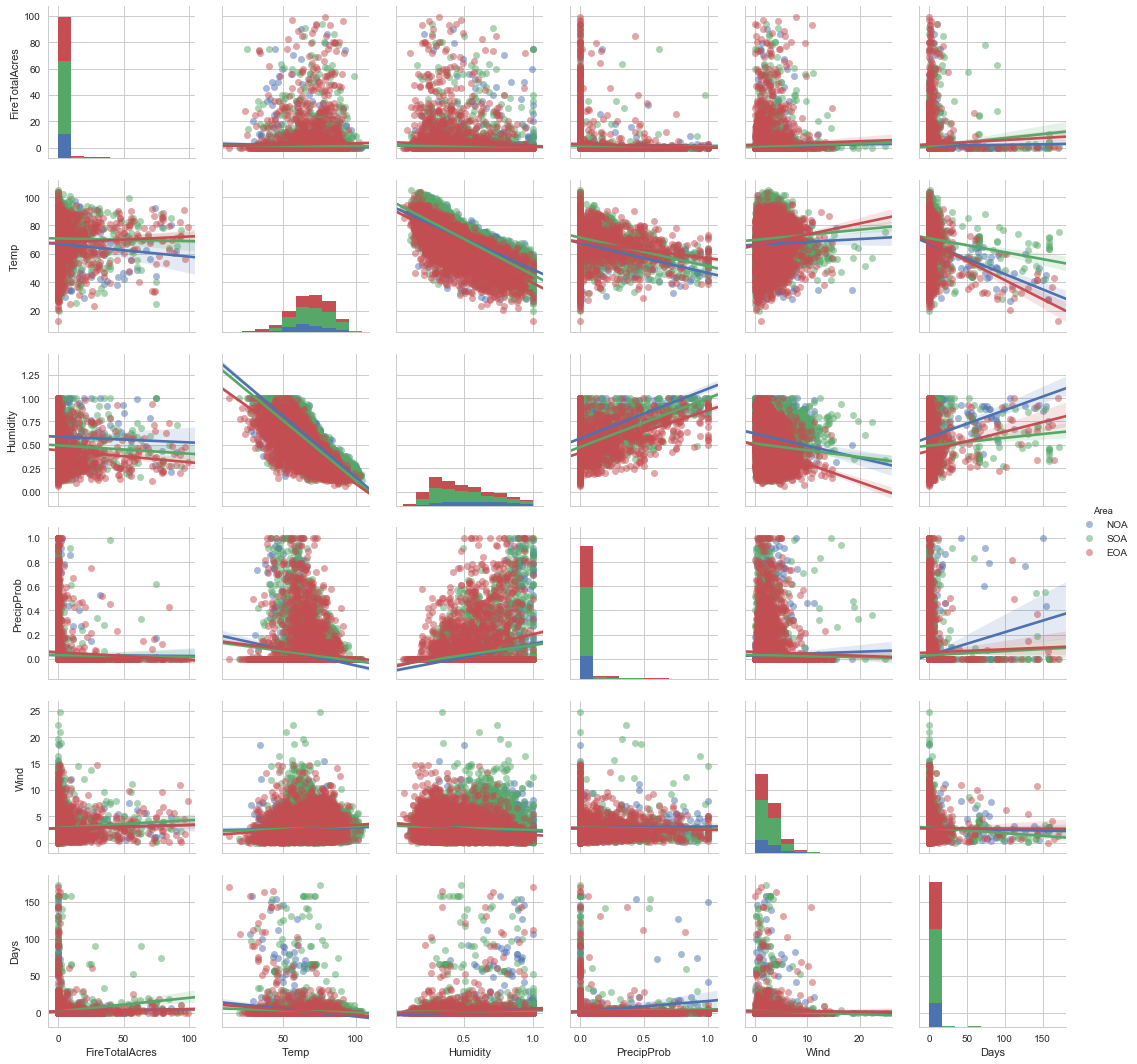

In [156]:
_ = sns.pairplot(pplot100,hue='Area',kind='reg', plot_kws ={'scatter_kws': {'alpha': 0.5}})

plt.show()

Based on these plots, it appears that there is a little more spread in the behavior of wind and temp.  Most of the data is sitting at the bottom. 

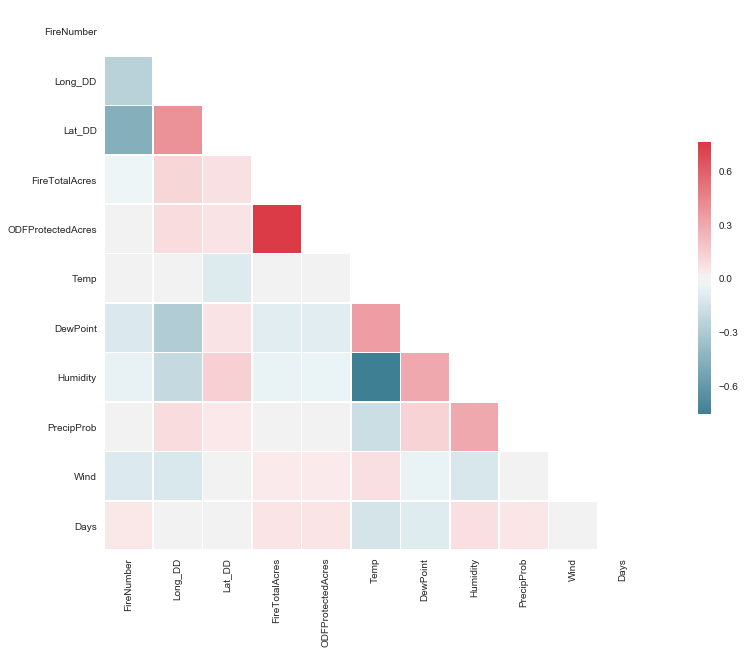

In [157]:
# sns.set(style='white')
#finding a correlation matrix
corr = corr100.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(18,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

It appears by isolating some of the smaller fires (less than 100 acres) which accounts for over 99% of the data points, there is a stronger correlation with wind and less of a correlation with temperature.  It appears that dewpoint has a better correlation than temperature for fires that are smaller than 100 acres.  